#Logistic Regression:

*Logistic Regression is a supervised machine learning algorithm used to analyze the relationship between two data factors.
*In Logistic Regression, the target variable is discrete(binary,i.e two outcomes)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

In [3]:
train.shape,test.shape

((891, 12), (418, 11))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

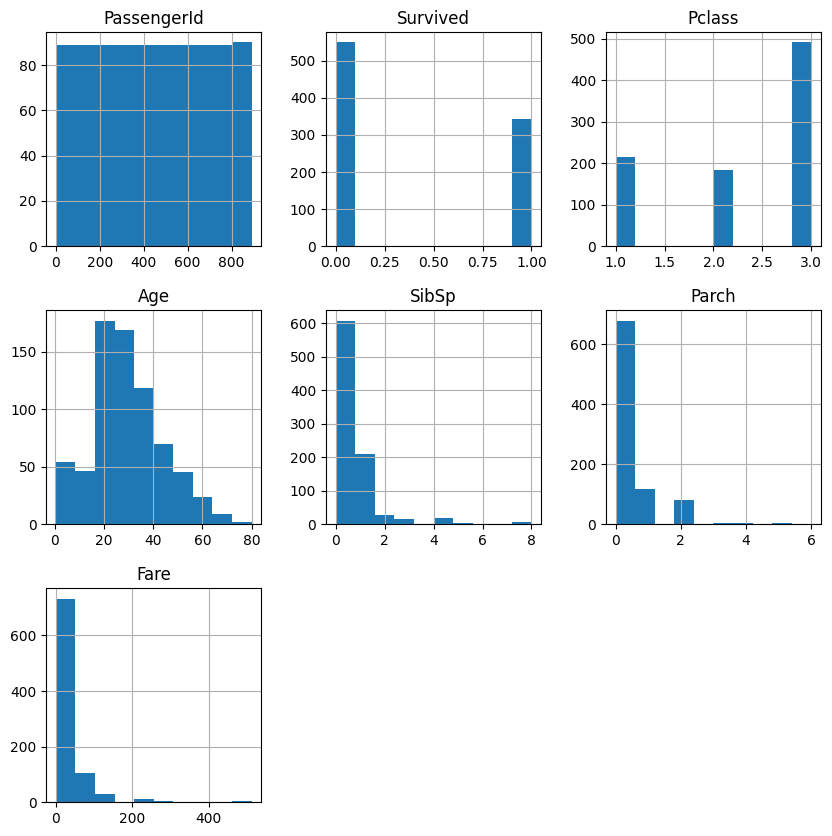

In [11]:
train.hist(figsize=(10,10))

<Axes: >

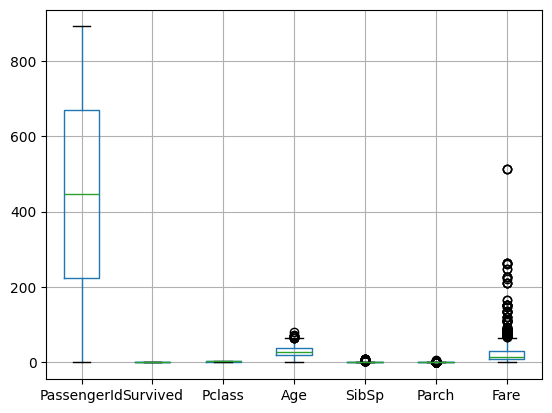

In [12]:
train.boxplot()

C:\Users\Engga\AppData\Local\Temp\ipykernel_24356\452470819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived",y="PassengerId",data=train,palette = 'hls')


<Axes: xlabel='Survived', ylabel='PassengerId'>

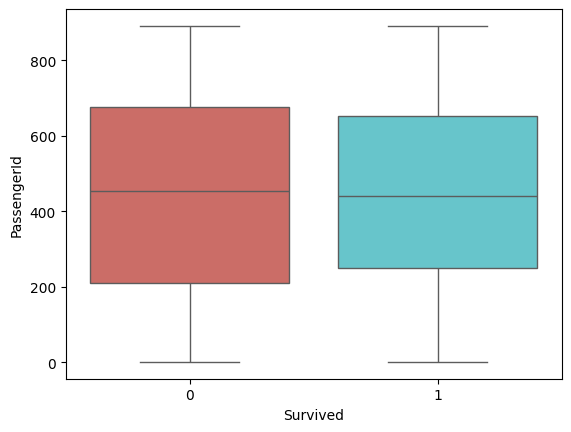

In [13]:
#boxplot between survival and passengerID
sns.boxplot(x="Survived",y="PassengerId",data=train,palette = 'hls')

C:\Users\Engga\AppData\Local\Temp\ipykernel_24356\2819806041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "Survived",y='Age',data=train,palette = 'hls')


<Axes: xlabel='Survived', ylabel='Age'>

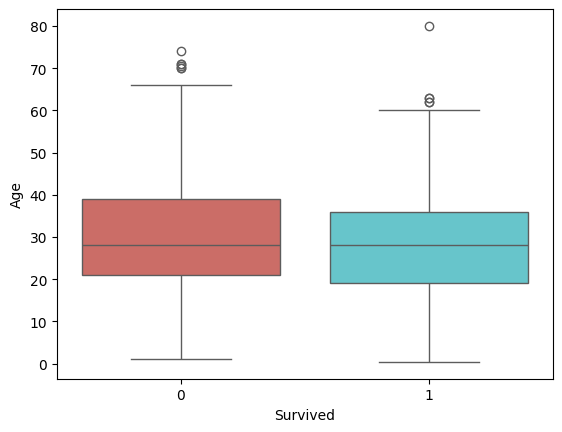

In [15]:
#boxplot between survival and age
sns.boxplot(x= "Survived",y='Age',data=train,palette = 'hls')

C:\Users\Engga\AppData\Local\Temp\ipykernel_24356\1582112051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived',y='Fare',data = train,palette = 'hls')


<Axes: xlabel='Survived', ylabel='Fare'>

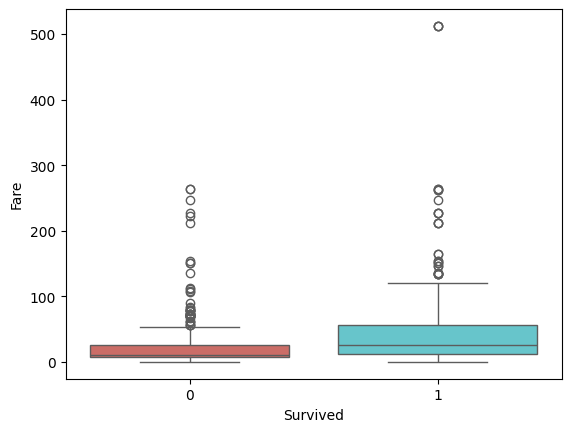

In [16]:
#boxplot between survival and fare
sns.boxplot(x='Survived',y='Fare',data = train,palette = 'hls')

C:\Users\Engga\AppData\Local\Temp\ipykernel_24356\3912765797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived',y='Pclass',data = train,palette='hls')


<Axes: xlabel='Survived', ylabel='Pclass'>

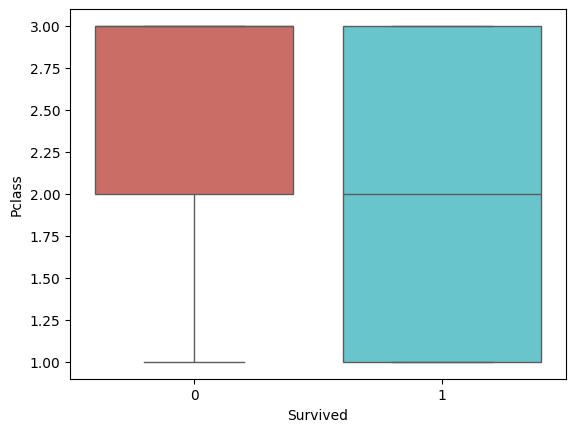

In [17]:
#boxplot between survival and Pclass
sns.boxplot(x='Survived',y='Pclass',data = train,palette='hls')

C:\Users\Engga\AppData\Local\Temp\ipykernel_24356\596312562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived',y='SibSp',data=train,palette = 'hls')


<Axes: xlabel='Survived', ylabel='SibSp'>

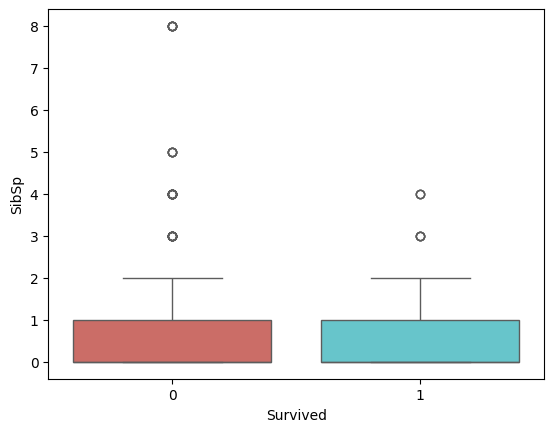

In [18]:
#boxplot between survival and sibsp
sns.boxplot(x='Survived',y='SibSp',data=train,palette = 'hls')

C:\Users\Engga\AppData\Local\Temp\ipykernel_24356\1627539796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived',y='Parch',data=train,palette = 'hls')


<Axes: xlabel='Survived', ylabel='Parch'>

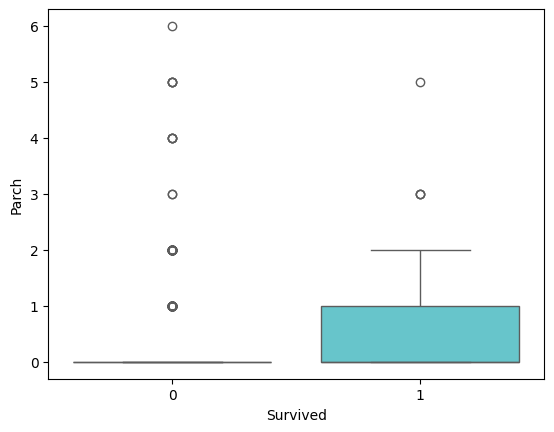

In [19]:
#boxplot between survival and Parch
sns.boxplot(x='Survived',y='Parch',data=train,palette = 'hls')

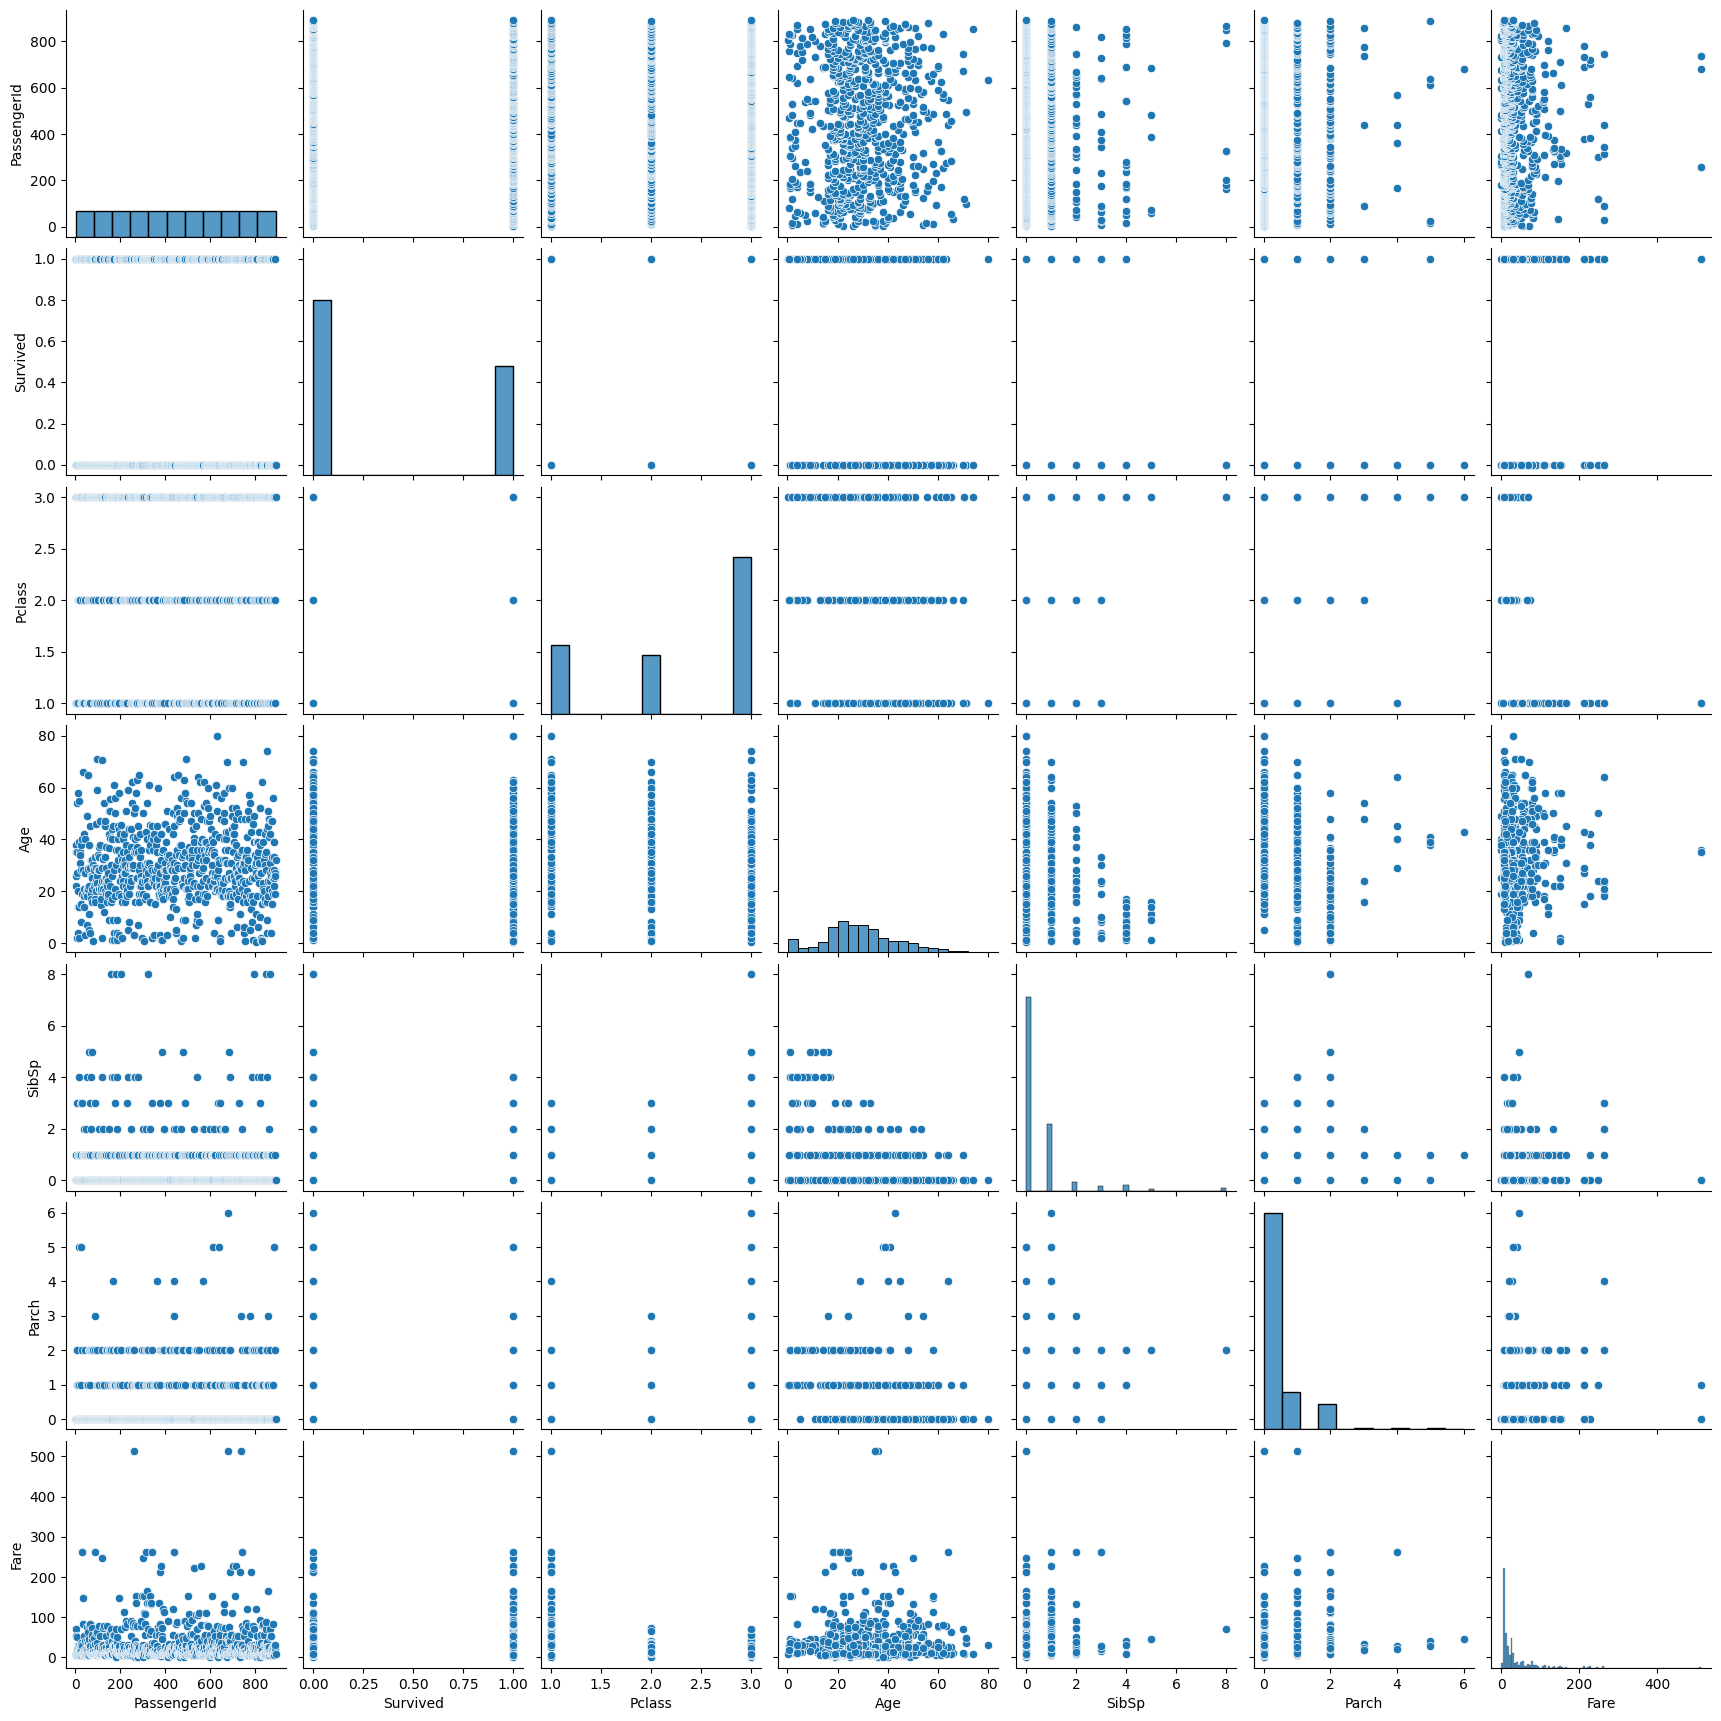

In [20]:
#visualization of training set using paiplot
sns.pairplot(train)

In [21]:
#correlation between passengerId and survival
train['PassengerId'].corr(train['Survived'])

-0.005006660767066487

Data Processing:

In [25]:
train1 = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test1 = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [26]:
train1.shape,test1.shape

((891, 8), (418, 7))

In [27]:
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:
test1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


<Axes: xlabel='Survived', ylabel='count'>

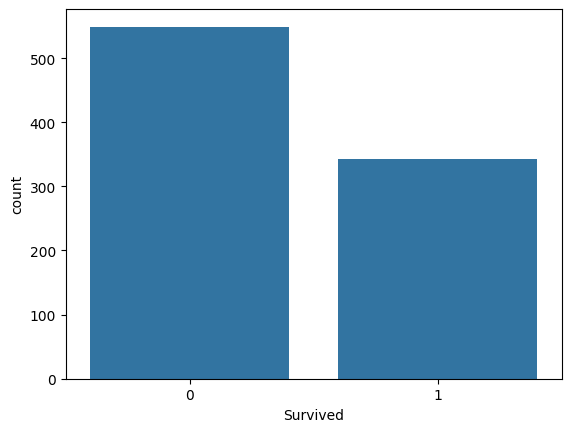

In [29]:
sns.countplot(x='Survived',data=train1)

In [30]:
train1.isnull().sum(),test1.isnull().sum()

(Survived      0
 Pclass        0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Fare          0
 Embarked      2
 dtype: int64,
 Pclass       0
 Sex          0
 Age         86
 SibSp        0
 Parch        0
 Fare         1
 Embarked     0
 dtype: int64)

In [ ]:
train1['Age'].fillna(train1['Age'].mean(),inplace = True)
train1['Embarked'].fillna(train1['Embarked'].mode()[0],inplace=True)
test1['Age'].fillna(test1["Age"].mean(),inplace=True)
test1['Fare'].fillna(test1['Fare'].mean(),inplace=True)

In [32]:
train1.isnull().sum(),test1.isnull().sum()

(Survived    0
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 dtype: int64,
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 dtype: int64)

In [33]:
#create dummies for 'Sex'and 'Embarked'
train1 = pd.get_dummies(train1,columns=['Sex','Embarked'],dtype=int)
test1 = pd.get_dummies(test1,columns=['Sex','Embarked'],dtype=int)

In [34]:
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [35]:
test1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [37]:
#dividing training set into target variable y and features x
x_train = train1.drop('Survived',axis=1)
y_train = train1['Survived']

In [38]:
#here comes the logistic regression model
from sklearn.linear_model import LogisticRegression

In [39]:
model=LogisticRegression()

In [40]:
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
model.coef_

array([[-1.03369047, -0.03701092, -0.30295856, -0.09446196,  0.00251775,
         2.17937499, -0.4253204 ,  0.72451459,  0.69855971,  0.33098029]])

In [42]:
y_pred_train = model.predict(x_train)
y_pred_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [43]:
#probability values for training data
y_proba_train = model.predict_proba(x_train)
y_proba_train

array([[0.90558419, 0.09441581],
       [0.08519376, 0.91480624],
       [0.37743774, 0.62256226],
       ...,
       [0.52230123, 0.47769877],
       [0.39837581, 0.60162419],
       [0.87644462, 0.12355538]])

In [44]:
y_proba_train = pd.DataFrame(model.predict_proba(x_train))
new_train=pd.concat([train1,y_proba_train],axis=1)
new_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,0,1
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1,0.905584,0.094416
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0,0.085194,0.914806
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1,0.377438,0.622562
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1,0.114508,0.885492
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1,0.919609,0.080391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1,0.749285,0.250715
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1,0.053027,0.946973
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1,0.522301,0.477699
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0,0.398376,0.601624


In [45]:
new_train.rename(columns = {0:'Prob_0',1:'Prob_1'},inplace=True)
new_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Prob_0,Prob_1
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1,0.905584,0.094416
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0,0.085194,0.914806
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1,0.377438,0.622562
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1,0.114508,0.885492
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1,0.919609,0.080391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1,0.749285,0.250715
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1,0.053027,0.946973
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1,0.522301,0.477699
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0,0.398376,0.601624


In [46]:
x_test=test1
y_pred_test=model.predict(x_test)

In [47]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
model.predict_proba(x_test)

array([[0.8861003 , 0.1138997 ],
       [0.64154558, 0.35845442],
       [0.8840078 , 0.1159922 ],
       [0.89467516, 0.10532484],
       [0.43486111, 0.56513889],
       [0.83981515, 0.16018485],
       [0.32756278, 0.67243722],
       [0.80454172, 0.19545828],
       [0.23356172, 0.76643828],
       [0.92303167, 0.07696833],
       [0.90572019, 0.09427981],
       [0.67515331, 0.32484669],
       [0.07155353, 0.92844647],
       [0.9368743 , 0.0631257 ],
       [0.16497037, 0.83502963],
       [0.14822804, 0.85177196],
       [0.73593465, 0.26406535],
       [0.82163012, 0.17836988],
       [0.45996873, 0.54003127],
       [0.45288954, 0.54711046],
       [0.7088935 , 0.2911065 ],
       [0.82941737, 0.17058263],
       [0.07802391, 0.92197609],
       [0.35851052, 0.64148948],
       [0.09962394, 0.90037606],
       [0.96369865, 0.03630135],
       [0.04105072, 0.95894928],
       [0.82962152, 0.17037848],
       [0.63069558, 0.36930442],
       [0.91983764, 0.08016236],
       [0.

In [49]:
#probability values on testing data
y_proba_test = pd.DataFrame(model.predict_proba(x_test))
new_test = pd.concat([test1,y_proba_test],axis=1)
new_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,0,1
0,3,34.50000,0,0,7.8292,0,1,0,1,0,0.886100,0.113900
1,3,47.00000,1,0,7.0000,1,0,0,0,1,0.641546,0.358454
2,2,62.00000,0,0,9.6875,0,1,0,1,0,0.884008,0.115992
3,3,27.00000,0,0,8.6625,0,1,0,0,1,0.894675,0.105325
4,3,22.00000,1,1,12.2875,1,0,0,0,1,0.434861,0.565139
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1,0.905687,0.094313
414,1,39.00000,0,0,108.9000,1,0,1,0,0,0.060971,0.939029
415,3,38.50000,0,0,7.2500,0,1,0,0,1,0.928813,0.071187
416,3,30.27259,0,0,8.0500,0,1,0,0,1,0.905687,0.094313


In [50]:
#model evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
accuracy = accuracy_score(y_train,y_pred_train)
precision = precision_score(y_train,y_pred_train)
recall = recall_score(y_train,y_pred_train)
f1=f1_score(y_train,y_pred_train)
conf_matrix = confusion_matrix(y_train,y_pred_train)
results=pd.DataFrame([['Logistic Regression',accuracy,precision,recall,f1]],columns=['Model','Accuracy','Precision',"Recall",'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.802469,0.766026,0.69883,0.730887


In [51]:
#AUC SCORE
from sklearn.metrics import roc_curve,roc_auc_score
auc=roc_auc_score(y_train,new_train['Prob_1'])
auc

0.8579581162986398

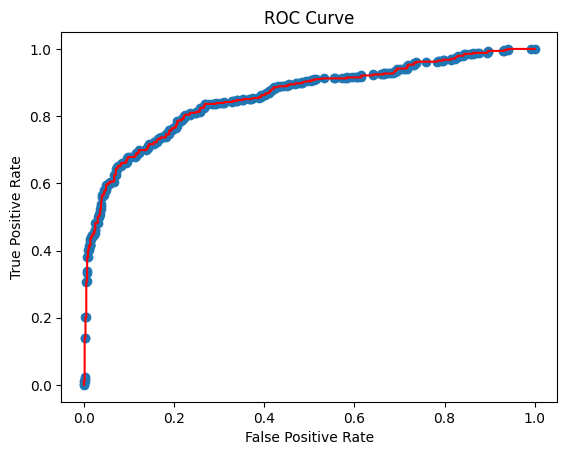

In [52]:
#ROC CURVE
fpr,tpr,thresholds=roc_curve(y_train,new_train['Prob_1'])

import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [53]:
coefficients = pd.DataFrame(model.coef_[0], x_train.columns, columns=['Coefficient'])
print(coefficients)

            Coefficient
Pclass        -1.033690
Age           -0.037011
SibSp         -0.302959
Parch         -0.094462
Fare           0.002518
Sex_female     2.179375
Sex_male      -0.425320
Embarked_C     0.724515
Embarked_Q     0.698560
Embarked_S     0.330980
